# MNIST Data Set - Basic Approach

### Get the MNIST Data

In [69]:
import tensorflow as tf

In [70]:
from tensorflow.examples.tutorials.mnist import input_data

In [71]:
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


** Alternative sources of the data just in case: **

* http://yann.lecun.com/exdb/mnist/
* https://github.com/mrgloom/MNIST-dataset-in-different-formats

In [72]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [73]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [74]:
mnist.train.images[0];

In [75]:
mnist.train.num_examples

55000

In [76]:
mnist.test.num_examples

10000

In [77]:
mnist.validation.num_examples

5000

### Visualizing the Data

In [78]:
import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
mnist.train.images[1].shape

(784,)

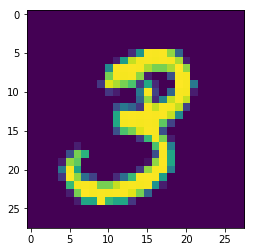

In [80]:
plt.imshow(mnist.train.images[1].reshape(28,28))

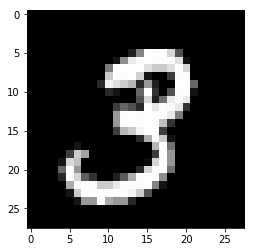

In [81]:
plt.imshow(mnist.train.images[1].reshape(28,28),cmap='gist_gray')

In [82]:
mnist.train.images[1].max()

1.0

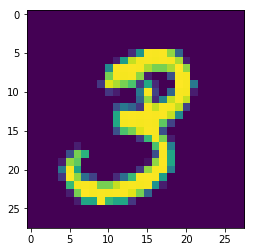

In [83]:
plt.imshow(mnist.train.images[1].reshape(28,28))

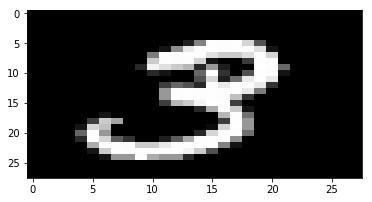

In [84]:
plt.imshow(mnist.train.images[1].reshape(28,28),cmap='gist_gray',aspect=0.5)

## Create the Model

In [85]:
x = tf.placeholder(tf.float32,shape=[None,784])

In [86]:
# 10 because 0-9 possible numbers
W = tf.Variable(tf.zeros([784,10]))

In [87]:
b = tf.Variable(tf.zeros([10]))

In [88]:
# Create the Graph
y = tf.matmul(x,W) + b 

Loss and Optimizer

In [89]:
y_true = tf.placeholder(tf.float32,[None,10])

In [90]:
# Cross Entropy

In [91]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true, logits=y))

In [92]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)

In [93]:
train = optimizer.minimize(cross_entropy)

### Create Session

In [94]:
init = tf.global_variables_initializer()

In [111]:
with tf.Session() as sess:
    sess.run(init)
    
    # Train the model for 1000 steps on the training set
    # Using built in batch feeder from mnist for convenience
    
    for step in range(1000):
        
        batch_x , batch_y = mnist.train.next_batch(100)
        
        sess.run(train,feed_dict={x:batch_x,y_true:batch_y})
        
    # Test the Train Model
    matches = tf.equal(tf.argmax(y,1),tf.argmax(y_true,1))
    
    acc = tf.reduce_mean(tf.cast(matches,tf.float32))
    
    print(sess.run(acc,feed_dict={x:mnist.test.images,y_true:mnist.test.labels}))

0.9186


While this may seem pretty good, we can actually do much better, the best models can get above 99% accuracy.

How do they do this? By using other models, such as convolutional neural networks!